In [2]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy pandas matplotlib 

Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed


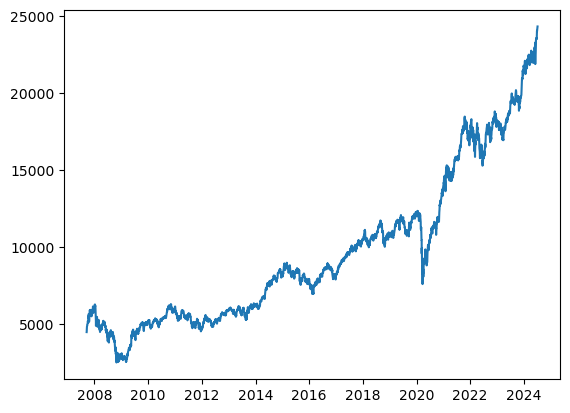

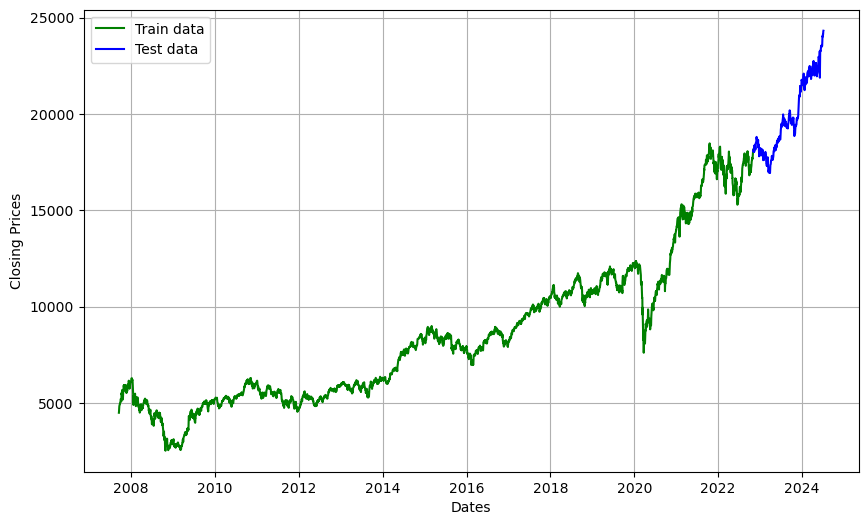

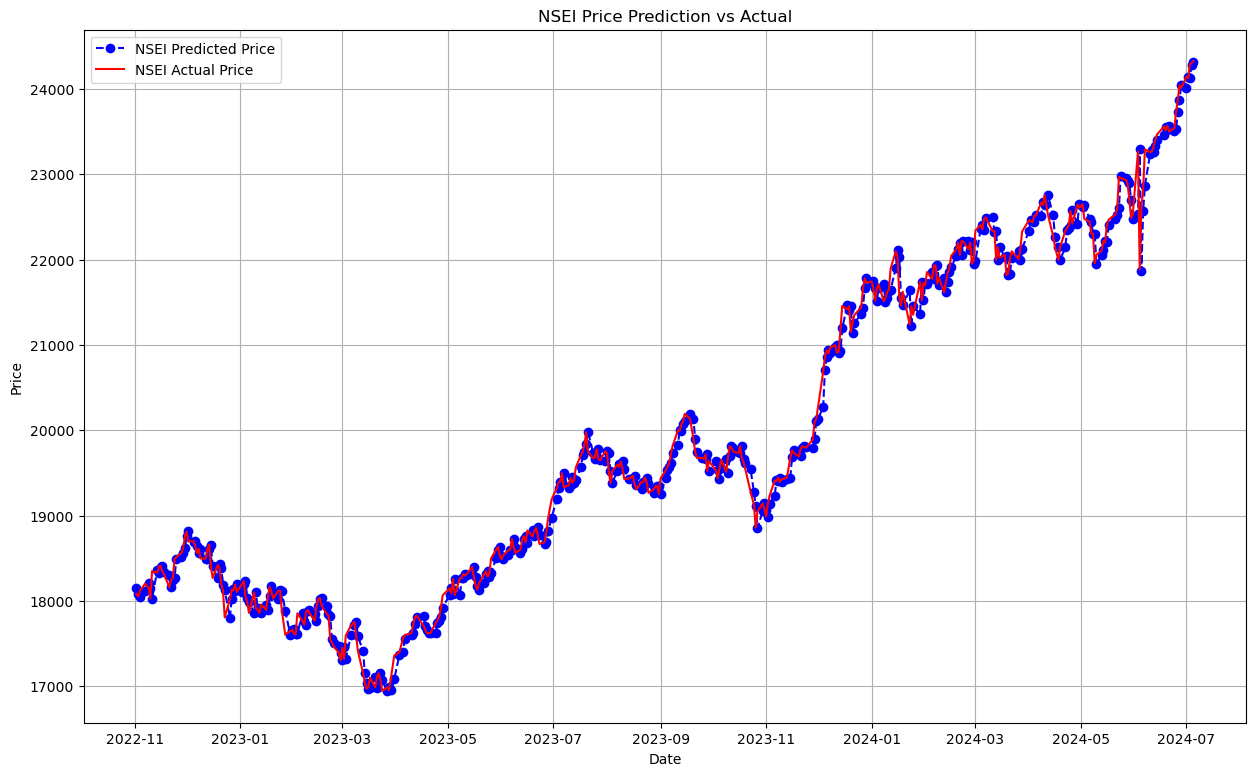

Mean Absolute Error: 107.67799759792463
Mean Absolute Percentage Error: 0.54%
Random Forest Mean Squared Error (MSE): 30.79022036767887
Random Forest Mean Absolute Error (MAE): 2.3381179365138998


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


df = yf.download('^NSEI')


plt.plot(df.index, df['Adj Close'])
plt.show()


to_row = int(len(df) * 0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])


plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()
plt.show()


model_predictions = []
errors = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)
    error = abs(yhat - actual_test_value)
    errors.append(error)


plt.figure(figsize=(15, 9))
plt.grid(True)
date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='NSEI Predicted Price')
plt.plot(date_range, testing_data, color='red', label='NSEI Actual Price')
plt.title('NSEI Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


mae = np.mean(errors)
print(f'Mean Absolute Error: {mae}')


mape = mean_absolute_percentage_error(testing_data, model_predictions) * 100
print(f'Mean Absolute Percentage Error: {mape:.2f}%')


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(np.array(training_data).reshape(-1, 1), training_data)


rf_predictions = rf_model.predict(np.array(testing_data).reshape(-1, 1))


rf_mse = mean_squared_error(testing_data, rf_predictions)
rf_mae = mean_absolute_error(testing_data, rf_predictions)

print(f'Random Forest Mean Squared Error (MSE): {rf_mse}')
print(f'Random Forest Mean Absolute Error (MAE): {rf_mae}')
